In [21]:
import numpy as np
import torch
import torch.nn as nn
import math

### Positional Encodings
***
1. **`What are Positional Encodings`**
2. **`Why does Positional Encoding Matter`**
3. **`Why are Positional Encodings used in Transformers`**
4. **`Math Behind Positional Encodings`**

Sources: <br>
[Introduction to Positional Encoding by Batool Haider](https://www.youtube.com/watch?v=dichIcUZfOw)
<br>
[Positional Encoding by Code Emporium](https://www.youtube.com/watch?v=ZMxVe-HK174&list=PLekWUh7RWD7xFxSDVtEIhxuaaKZ3-QJ20&index=90)

#### 1. What are Positional Encodings
***
- Positional Encodings are similar to word embeddings, but are used to describe the positioning of each word in a sentence
- They are added on towards the word embeddings in the first steps of a transformer

<img src=attachment:6011f6bf-0a66-45a5-ad09-8575e9a1fe05.png width=500>
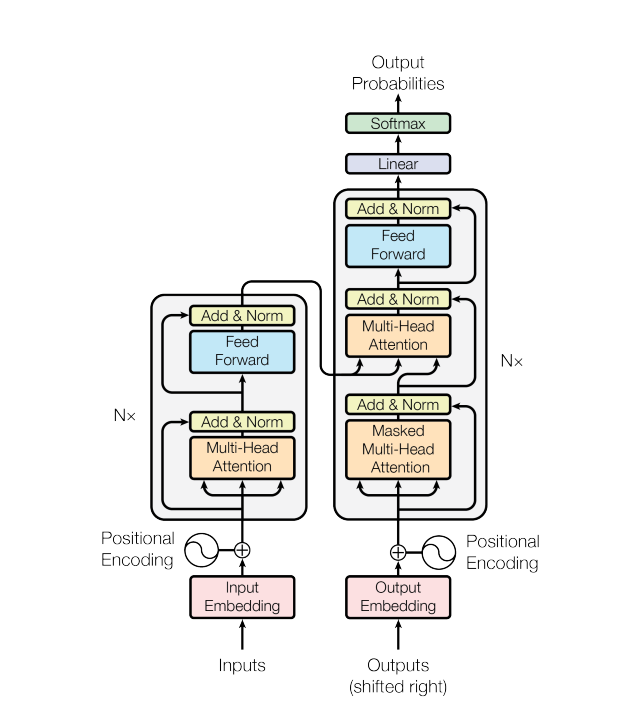

#### 2. Why does Positional Encodings Matter
***
- The positioning of the words matter in a sentence
- The shifting or misplacement of a words can affect the entire context or tone of a sentence

**Example**

After the defeat of Argentina during the World Cup, Lionel Messi was at his lowest point.

#### 3. Why are Positional Encodings Used for in Transformers
***
1. **Age of Pre-Transformers**
    - Before Transformer models, ML scientist used RNNs to process sequential data such as language or sound.
    - However, RNNs (LSTM and Vanilla RNNs) are slow as they take extract words from a sentence one step at a time.
    - This is where Transformers come into place as they compute words in parallel
  
2. **Why Positional Encoding in Transformers**
    - Back to answering the question,
    - Transformers do not keep track of the positional order of words in a sentence
    - Thats where positional encodings come into player, they add positional meaning towards our existing word embeddings

#### 4. Math Behind Postitional Encoding
***
1. $PE(pos, 2i) = sin(\frac{pos}{10000^{\frac{2i}{d_{model}}}})$
    - Only applies to when the indices are even

2. $PE(pos, 2i+1) = cos(\frac{pos}{10000^{\frac{2i}{d_{model}}}})$
    - Only applies to when the indices are odd


- $pos$: the positioning of the word
- $i$: the indices of each element in a word embedding
- $d_{model}$: the dimension of the word embeddings

In [22]:
torch.manual_seed(42)
sentence_embeddings = torch.rand(2,6)

# Assuming 1st index being Lets 
# Assuming 2nd index being Go
sentence_embeddings

# d length of the sentence 
# i value:  0, 2, 4, ... d (even)
# i value:  0, 2, 4, ... d-1 (odd)

# torch.sin(pos/10000 ** (2i/d))

tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408, 0.1332, 0.9346, 0.5936]])

In [23]:
d = len(sentence_embeddings)
max_length = 5

pos = torch.Tensor([[i] for i in range(d)])
even_index = torch.arange(0, max_length, 2)
odd_index = torch.arange(1, max_length, 2)

In [24]:
even_denominator = torch.pow(10000, (2 * even_index) / d)
odd_denominator = torch.pow(10000, (2 * odd_index) / d)


In [25]:
even_pos_encoding = torch.sin(pos / even_denominator)
odd_pos_encoding = torch.cos(pos / odd_denominator)

In [26]:
x = torch.rand(2,3)
y = torch.rand(2,2)
z_t = torch.zeros(2, 5)

j = k = 0
for i in range(5):
    if i % 2 == 0:
        z_t[:, i] = x[:, j]
        j += 1
    else:
        z_t[:, i] = y[:, k]
        k += 1

x, y, z_t

(tensor([[0.8694, 0.5677, 0.7411],
         [0.4294, 0.8854, 0.5739]]),
 tensor([[0.2666, 0.6274],
         [0.2696, 0.4414]]),
 tensor([[0.8694, 0.2666, 0.5677, 0.6274, 0.7411],
         [0.4294, 0.2696, 0.8854, 0.4414, 0.5739]]))

In [40]:
class Positional_Encoder:
    def __init__(self, max_length, batch):
        self.max_length = max_length
        self.batch = batch
        
    def fit_transform(self):
        d_model = len(self.batch)
        z_t = torch.zeros(2, self.max_length)
        
        pos_vector = torch.Tensor([[i] for i in range(d_model)])

        even_index = torch.arange(0, self.max_length, 2)
        odd_index = torch.arange(1, self.max_length, 2)

        even_denominator = torch.pow(10000, (2 * even_index) / d_model)
        odd_denominator = torch.pow(10000, (2 * odd_index) / d_model)

        even_pos_encoding = torch.sin(pos_vector/ even_denominator)
        odd_pos_encoding = torch.cos(pos_vector / odd_denominator)


        j = k = 0
        for i in range(self.max_length):
            if i % 2 == 0:
                z_t[:, i] = even_pos_encoding[:, j]
                j += 1
            else:
                z_t[:, i] = odd_pos_encoding[:, k]
                k += 1

        return z_t

In [39]:
pos_encoder = Positional_Encoder(max_length=6, batch=sentence_embeddings)
pos_encoder.fit_transform()

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [8.4147e-01, 1.0000e-08, 1.0000e-16]]) tensor([[1., 1., 1.],
        [1., 1., 1.]])


tensor([[0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00],
        [8.4147e-01, 1.0000e+00, 1.0000e-08, 1.0000e+00, 1.0000e-16, 1.0000e+00]])

In [51]:
def positional_encodings(n:int=10000, d_model:int=4, max_length:int=8):
    """
    n: (int) constant value 
    d_model (int): the dimension of the word embeddings 
    max_length (int): the total words in a sentence 
    
    """
    divisor = torch.exp(torch.arange(0, d_model, 2) * -(math.log(n) / d_model)) # Creates the denominator component 

    k = torch.arange(0, max_length).unsqueeze(dim=1) # Creates the position elements 
    pe = torch.zeros(max_length, d_model) # Creates the empty array 
    pe[:, 0::2] = torch.sin(k * divisor)
    pe[:, 1::2] = torch.cos(k * divisor)
    
    return pe.squeeze(0)

positional_encodings()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0100,  0.9999],
        [ 0.9093, -0.4161,  0.0200,  0.9998],
        [ 0.1411, -0.9900,  0.0300,  0.9996],
        [-0.7568, -0.6536,  0.0400,  0.9992],
        [-0.9589,  0.2837,  0.0500,  0.9988],
        [-0.2794,  0.9602,  0.0600,  0.9982],
        [ 0.6570,  0.7539,  0.0699,  0.9976]])

#### Parallel Positional Encoder
***

1. **Original Equation for Positional Encodings**
   1. $PE(pos, 2i) = sin(\frac{pos}{10000^{\frac{2i}{d_{model}}}})$
   2. $PE(pos, 2i+1) = cos(\frac{pos}{10000^{\frac{2i}{d_{model}}}})$
  
Source: https://medium.com/@hunter-j-phillips/positional-encoding-7a93db4109e6
- We can expland the denominator section into logarithmic format

Denominator Portion: $\frac{1}{n^{\frac{2i}{d_{model}}}}$ where $n = 10000$

<img src=attachment:c060aaba-b87b-4df0-a91a-4568e851f8b8.png width=500>
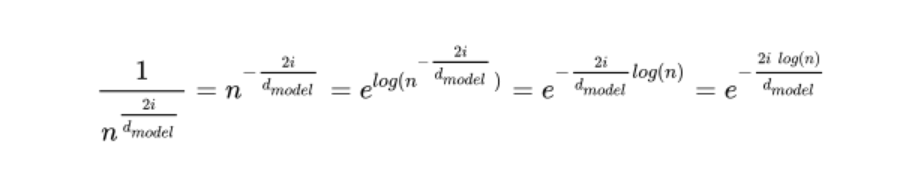

In [53]:
class Positional_Encoding(nn.Module):
    def __init__(self, drop_value:float=0.1, d_model:int=4, max_length:int=5000):
        super().__init__()
        """
        drop_value (float) drop out value 
        n: (int) constant value 
        d_model (int): the dimension of the word embeddings 
        max_length (int): the total words in a sentence 
        """
        
        self.divisor = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000) / d_model)) # Creates the denominator component 
        self.drop_out = nn.Dropout(drop_value)
    
        self.k = torch.arange(0, max_length).unsqueeze(dim=1) # Creates the position elements 
        self.pe = torch.zeros(max_length, d_model) # Creates the empty array that will store the positional encodings
        
        self.pe[:, 0::2] = torch.sin(self.k * self.divisor) # For every row and even column add torch.sin
        self.pe[:, 1::2] = torch.cos(self.k * self.divisor) # For every row and odd column add torch.cos
        
        self.pe.squeeze(0)

    def forward(self, x):
        return self.drop_out(x + self.pe[:x.size(0)].requires_grad_(False))
        
pe = Positional_Encoding(d_model=4)

embeddings = torch.rand(10, 4)
pe(embeddings)

tensor([[ 0.3198,  1.3220,  0.1458,  1.9407],
        [ 1.6948,  1.0335,  0.6016,  1.5677],
        [ 1.9640,  0.0168,  0.0000,  1.3899],
        [ 0.4400, -0.0000,  0.5266,  1.1984],
        [-0.7453,  0.0000,  0.1009,  1.8110],
        [-0.2418,  1.0304,  0.5400,  1.8724],
        [-0.1793,  1.4189,  0.1527,  1.2968],
        [ 0.9761,  0.9444,  0.0000,  1.5143],
        [ 1.3035,  0.6607,  1.0530,  1.1401],
        [ 1.4054,  0.0372,  0.8370,  2.1192]])